## DECISION TREE


### Objective:


The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,classification_report
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [4]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,846.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,3,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,FALSE,NaN,flat,normal,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,535,NaN,453,361,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.093875,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.500000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


In [5]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [6]:
# Finding out if there are any null values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# Mapping categorical values to numerical
df['sex'] = df['sex'].map({'Male': 1,'Female': 0})

In [8]:
df['fbs'] = df['fbs'].astype(int)

In [9]:
# Mapping the 'restecg' column
df['restecg'] = df['restecg'].replace({'normal':0,'st-t abnormality':1,'lv hypertrophy': 2})

In [10]:
# Cleaning and mapping the 'exang' column
df['exang'] = df['exang'].replace('TURE', 'TRUE')
df['exang'] = df['exang'].replace({'FALSE': 0, 'TRUE': 1}).astype(int)


In [11]:
# Checking for missing values in 'oldpeak'
print(f"Percentage of missing values in column oldpeak: {df['oldpeak'].isna().mean() * 100}")

Percentage of missing values in column oldpeak: 6.828193832599119


In [12]:
# Filling missing values in 'oldpeak' with the median
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [13]:
# Confirming no missing values remain
df['oldpeak'].isnull().sum()

0

<Figure size 700x2800 with 0 Axes>

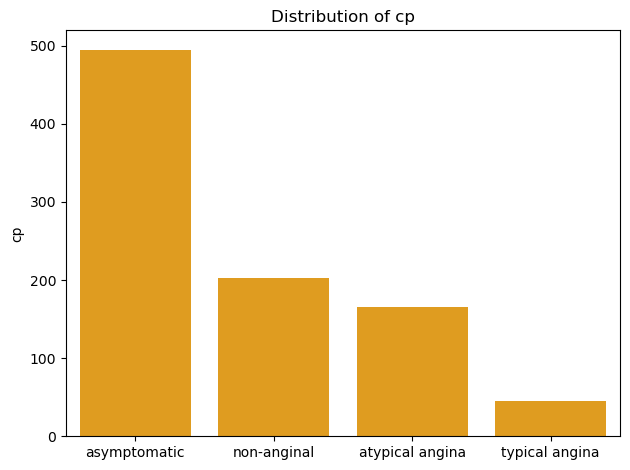

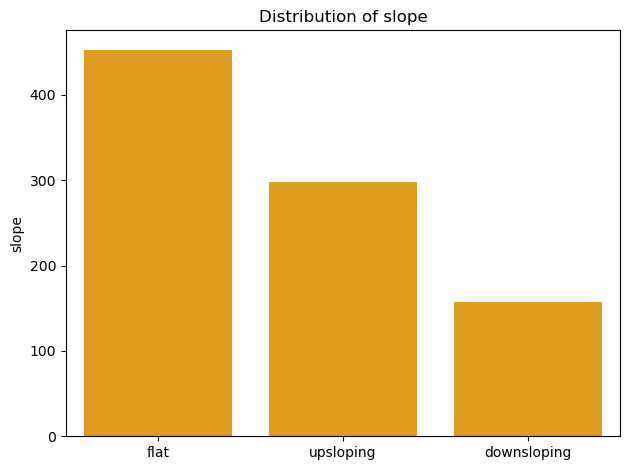

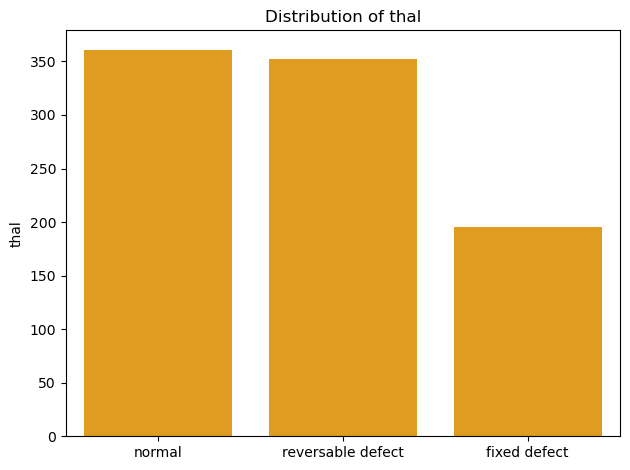

In [14]:
# Univariate Analysis - Barplot for categorical columns
plt.figure(figsize=(7,28))
for i in df.select_dtypes(include='object').columns:
    plt.subplots()
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), color='Orange')
    plt.title(f'Distribution of {i}')
    plt.tight_layout()
    plt.show()


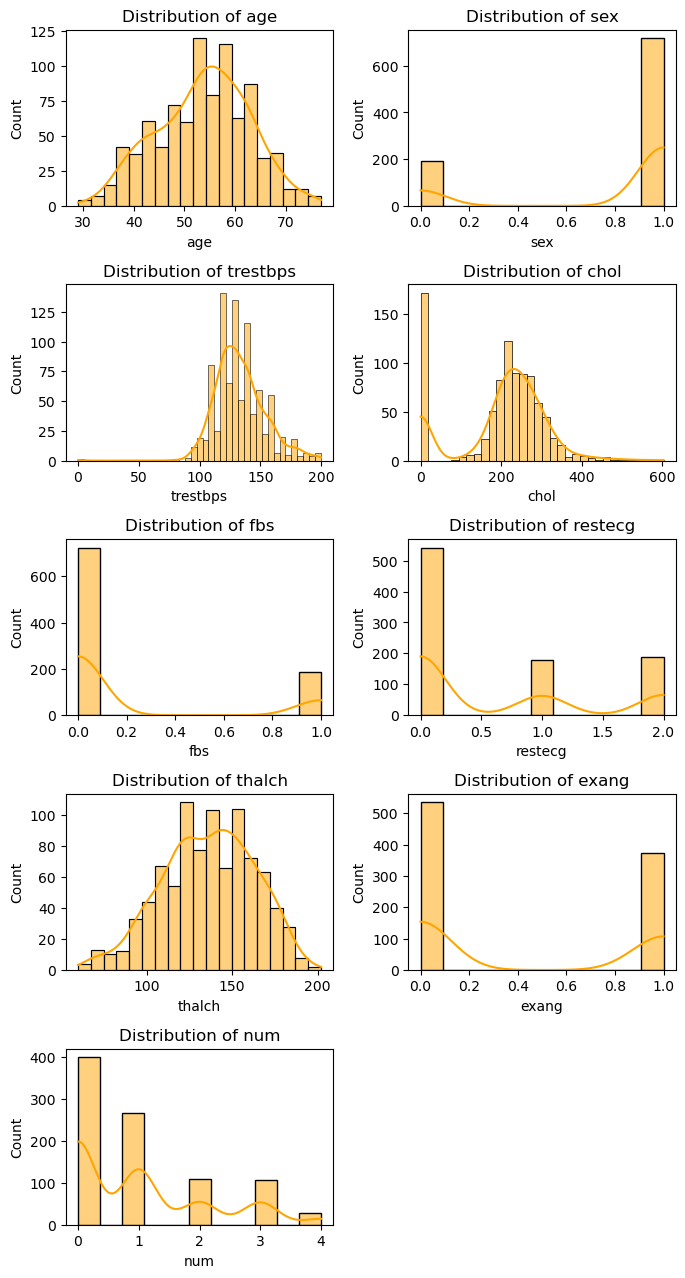

In [15]:
# Univariate Analysis - Distribution plot for numerical data
data = df.select_dtypes(include=int)
plt.figure(figsize=(7,15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(6,2,i)
    sns.histplot(data[column], kde=True, color='Orange')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()
     

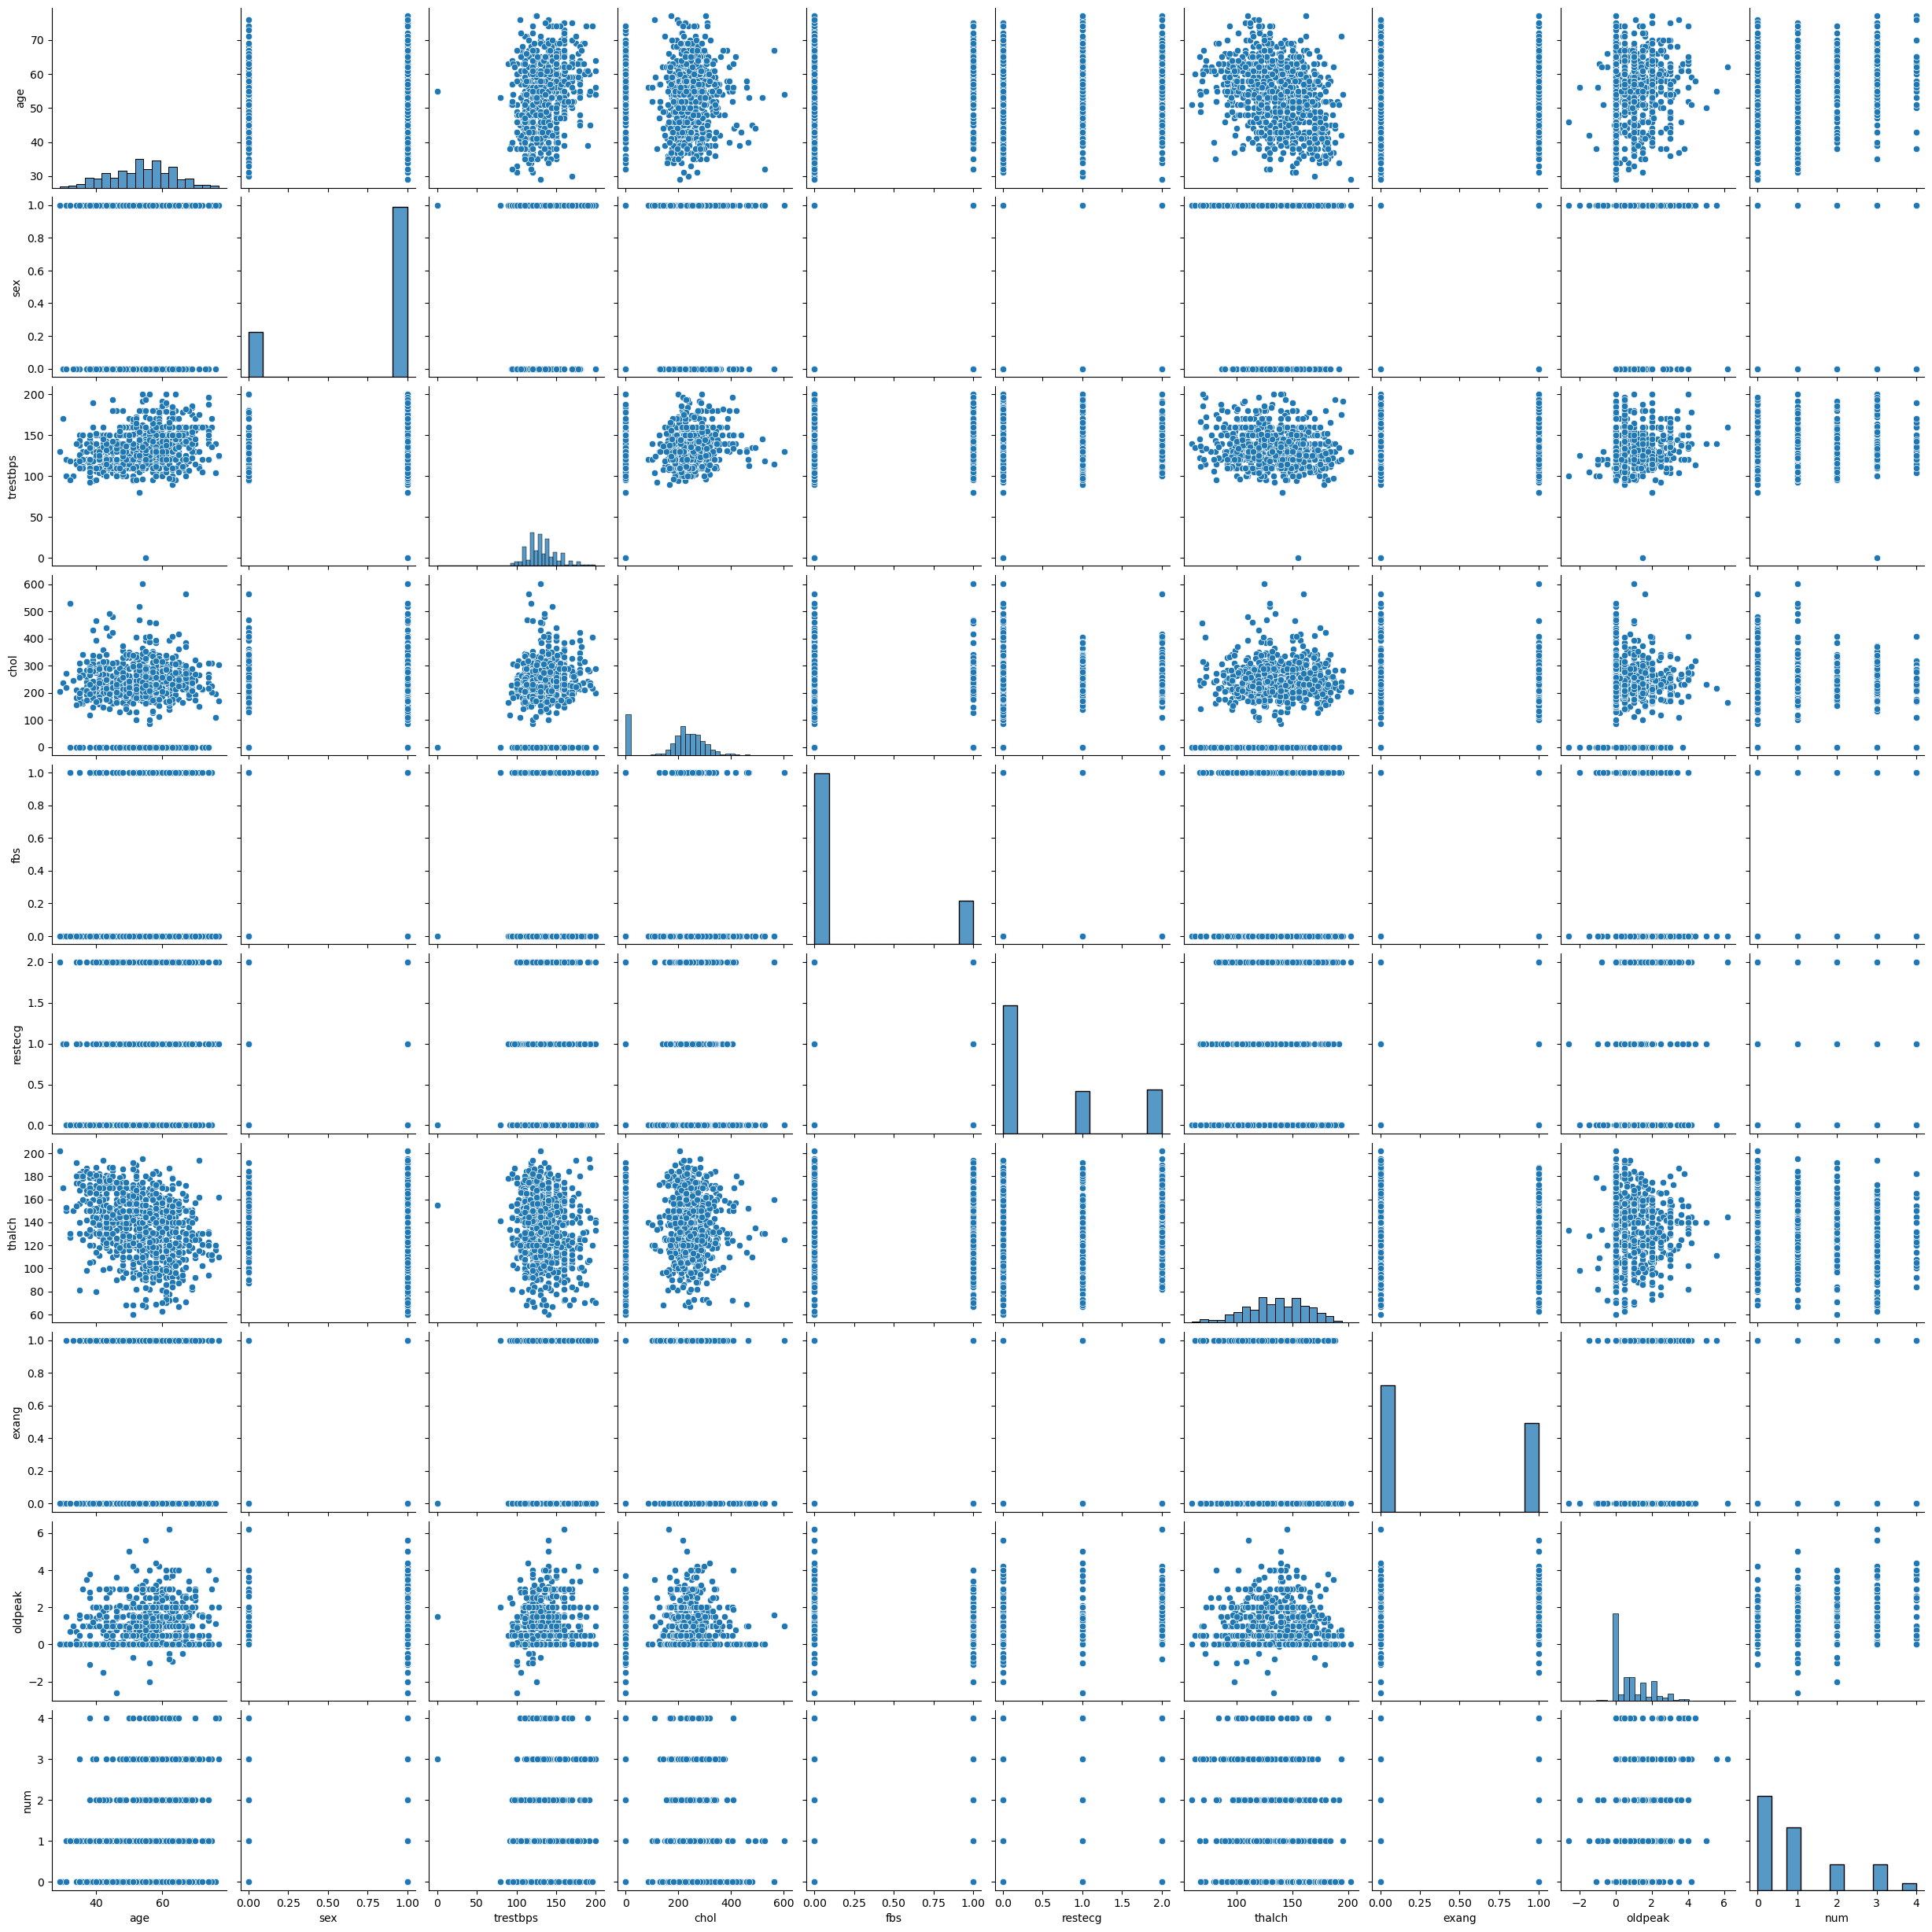

In [16]:
sns.pairplot(df)
plt.show()

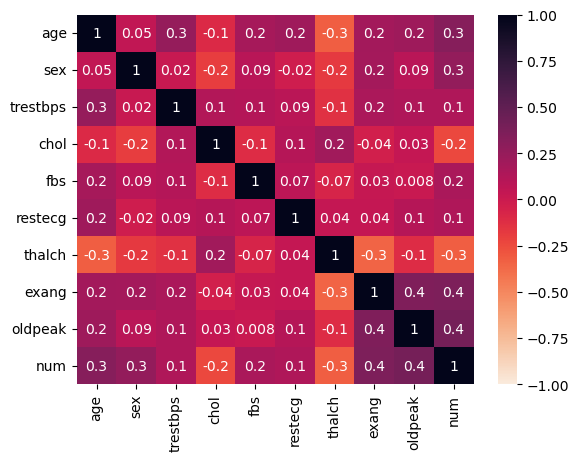

In [17]:
# Multivariate Analysis - Heatmap for correlation between columns
sns.heatmap(df.select_dtypes(exclude='object').corr(), vmax=1, center=0, vmin=-1, annot=True, fmt='.1g', cmap="rocket_r")
plt.show()
     

In [18]:
# Data Encoding - Converting categorical data to numerical format
df = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], dtype=int)

In [19]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping
0,63,1,145,233,1,2,150,0,2.3,0,0,0,0,1,1,0,0,1,0,0
1,41,1,135,203,0,0,132,0,0.0,0,0,1,0,0,1,0,0,0,1,0
2,57,1,140,192,0,0,148,0,0.4,0,1,0,0,0,1,0,0,0,1,0
3,52,1,118,186,0,2,190,0,0.0,0,0,0,0,1,1,0,0,0,1,0
4,57,1,110,201,0,0,126,1,1.5,0,1,0,0,0,1,0,0,0,1,0


In [20]:
# Data Scaling - Scaling down the data
sc = StandardScaler()
x = sc.fit_transform(df.drop(columns='num'))
scaled_df = pd.DataFrame(data=x, columns=df.drop(columns='num').columns)
scaled_df.head()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping
0,1.006027,0.514416,0.567394,0.281297,1.976894,1.725276,0.524183,-0.834983,1.354403,-1.094782,-0.471246,-0.536603,4.379244,1.912174,-0.812381,-0.795672,2.187108,-0.997800,-0.698945
1,-1.397560,0.514416,0.076967,0.013526,-0.505844,-0.755406,-0.147705,-0.834983,-0.815718,-1.094782,2.122034,-0.536603,-0.228350,1.912174,-0.812381,-0.795672,-0.457225,1.002205,-0.698945
2,0.350503,0.514416,0.322181,-0.084656,-0.505844,-0.755406,0.449529,-0.834983,-0.438305,0.913424,-0.471246,-0.536603,-0.228350,1.912174,-0.812381,-0.795672,-0.457225,1.002205,-0.698945
3,-0.195767,0.514416,-0.756760,-0.138211,-0.505844,1.725276,2.017268,-0.834983,-0.815718,-1.094782,-0.471246,-0.536603,4.379244,1.912174,-0.812381,-0.795672,-0.457225,1.002205,-0.698945
4,0.350503,0.514416,-1.149102,-0.004325,-0.505844,-0.755406,-0.371668,1.197629,0.599578,0.913424,-0.471246,-0.536603,-0.228350,1.912174,-0.812381,-0.795672,-0.457225,1.002205,-0.698945


In [21]:
# Splitting the dataset into training and testing sets
x = scaled_df
y = df['num']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1, test_size=0.2)

In [22]:
# Print the train-test split data
xtrain.head()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping
612,0.569011,0.514416,-0.413461,-1.798388,-0.505844,-0.755406,-0.632958,1.197629,0.033460,0.913424,-0.471246,-0.536603,-0.22835,-0.522965,-0.812381,1.256800,-0.457225,-0.997800,1.430727
486,-1.506814,0.514416,0.910694,0.192040,-0.505844,-0.755406,1.681324,-0.834983,-0.815718,0.913424,-0.471246,-0.536603,-0.22835,-0.522965,-0.812381,1.256800,-0.457225,-0.997800,1.430727
494,-0.305021,0.514416,0.322181,0.870392,-0.505844,-0.755406,1.382707,1.197629,0.693931,0.913424,-0.471246,-0.536603,-0.22835,-0.522965,-0.812381,1.256800,-0.457225,-0.997800,1.430727
677,1.443043,0.514416,-0.658674,0.316999,-0.505844,-0.755406,-2.424660,-0.834983,0.127813,0.913424,-0.471246,-0.536603,-0.22835,-0.522965,1.230949,-0.795672,-0.457225,1.002205,-0.698945
233,-0.632783,-1.943951,2.283891,0.950723,-0.505844,0.484935,-0.408995,-0.834983,1.071344,-1.094782,2.122034,-0.536603,-0.22835,-0.522965,1.230949,-0.795672,-0.457225,-0.997800,1.430727


In [23]:
xtest.head()

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping
685,-1.069798,0.514416,-1.051017,0.790061,-0.505844,1.725276,0.636164,-0.834983,-0.815718,0.913424,-0.471246,-0.536603,-0.228350,-0.522965,1.230949,-0.795672,-0.457225,-0.997800,1.430727
255,-0.414275,0.514416,1.793463,0.067080,-0.505844,0.484935,-0.744939,-0.834983,-0.815718,-1.094782,2.122034,-0.536603,-0.228350,-0.522965,1.230949,-0.795672,-0.457225,1.002205,-0.698945
868,1.224535,0.514416,-0.364418,0.986426,-0.505844,1.725276,0.748146,-0.834983,-0.343952,0.913424,-0.471246,-0.536603,-0.228350,1.912174,-0.812381,-0.795672,2.187108,-0.997800,-0.698945
142,-1.069798,0.514416,-0.168247,0.281297,-0.505844,-0.755406,1.606670,1.197629,-0.438305,-1.094782,-0.471246,1.863574,-0.228350,-0.522965,1.230949,-0.795672,-0.457225,-0.997800,1.430727
641,-2.162338,0.514416,0.322181,-0.405981,-0.505844,-0.755406,1.643997,-0.834983,-0.815718,-1.094782,-0.471246,-0.536603,4.379244,1.912174,-0.812381,-0.795672,-0.457225,-0.997800,1.430727


In [24]:
ytrain.head()

612    1
486    1
494    1
677    2
233    0
Name: num, dtype: int64

In [25]:
ytest.head()


685    2
255    0
868    3
142    0
641    1
Name: num, dtype: int64

In [26]:
# Model Training - Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [27]:
# Model Prediction
ypred = dt_classifier.predict(xtest)

In [28]:

# Model Evaluation
print(f"Accuracy: {accuracy_score(ytest, ypred)}")


Accuracy: 0.489010989010989


In [29]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65        81
           1       0.47      0.38      0.42        52
           2       0.28      0.42      0.33        19
           3       0.32      0.28      0.30        25
           4       0.00      0.00      0.00         5

    accuracy                           0.49       182
   macro avg       0.34      0.35      0.34       182
weighted avg       0.49      0.49      0.49       182



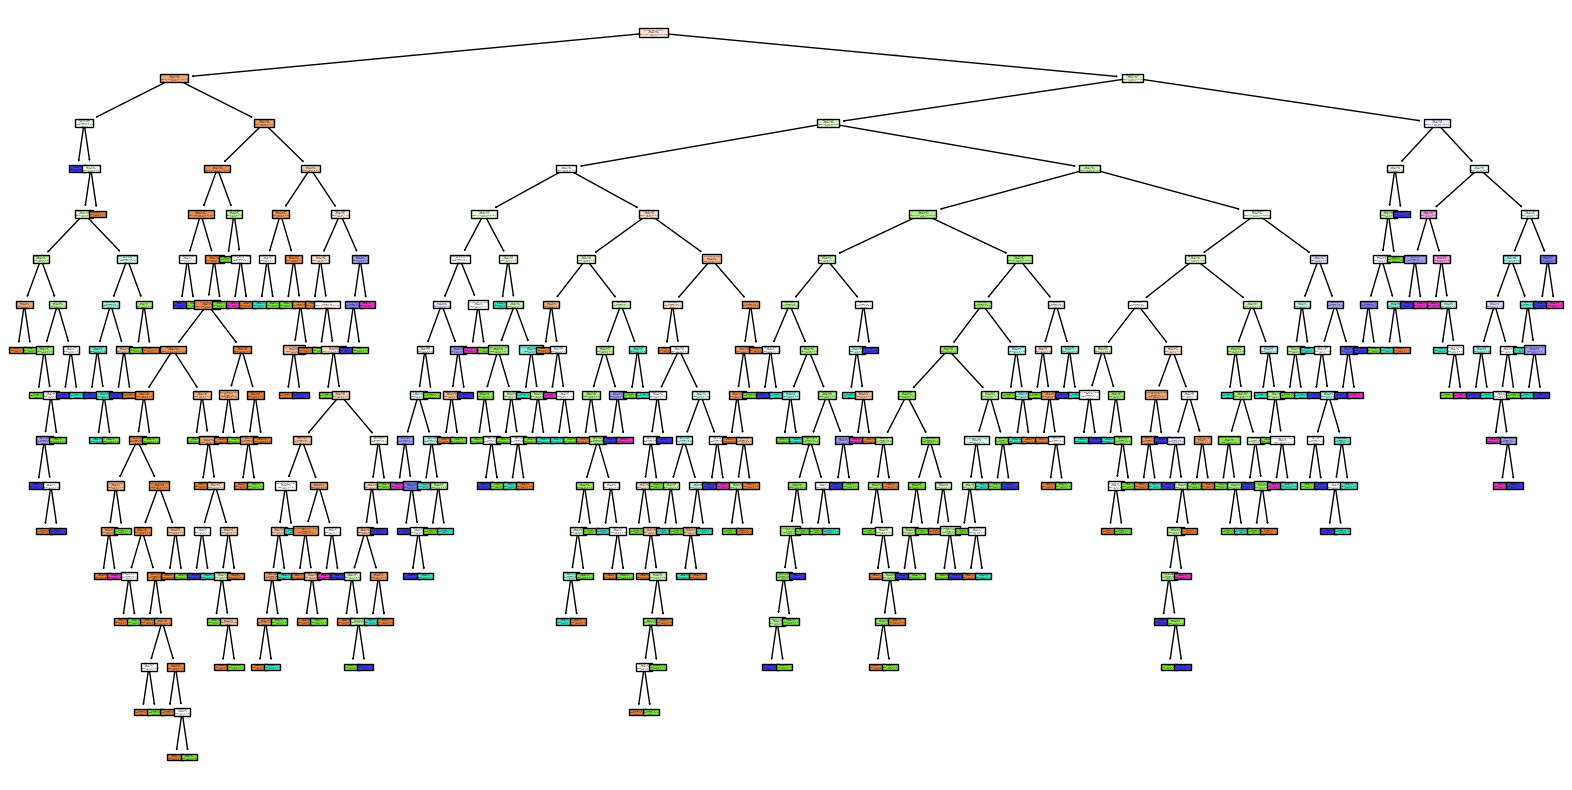

In [30]:
# Decision Tree Visualization
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=x.columns, class_names=['0', '1', '2', '3', '4'])
plt.show()

In [31]:
# Model Tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [32]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [33]:
# Retraining with Best Parameters
best_dt_classifier = grid_search.best_estimator_
best_dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=1)

In [34]:
# Model Prediction with Best Parameters
ypred_best = best_dt_classifier.predict(xtest)

In [35]:
# Model Evaluation with Best Parameters
print(f"Accuracy with Best Parameters: {accuracy_score(ytest, ypred_best)}")
print(classification_report(ytest, ypred_best))

Accuracy with Best Parameters: 0.521978021978022
              precision    recall  f1-score   support

           0       0.66      0.90      0.76        81
           1       0.33      0.40      0.36        52
           2       0.33      0.05      0.09        19
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00         5

    accuracy                           0.52       182
   macro avg       0.26      0.27      0.24       182
weighted avg       0.42      0.52      0.45       182



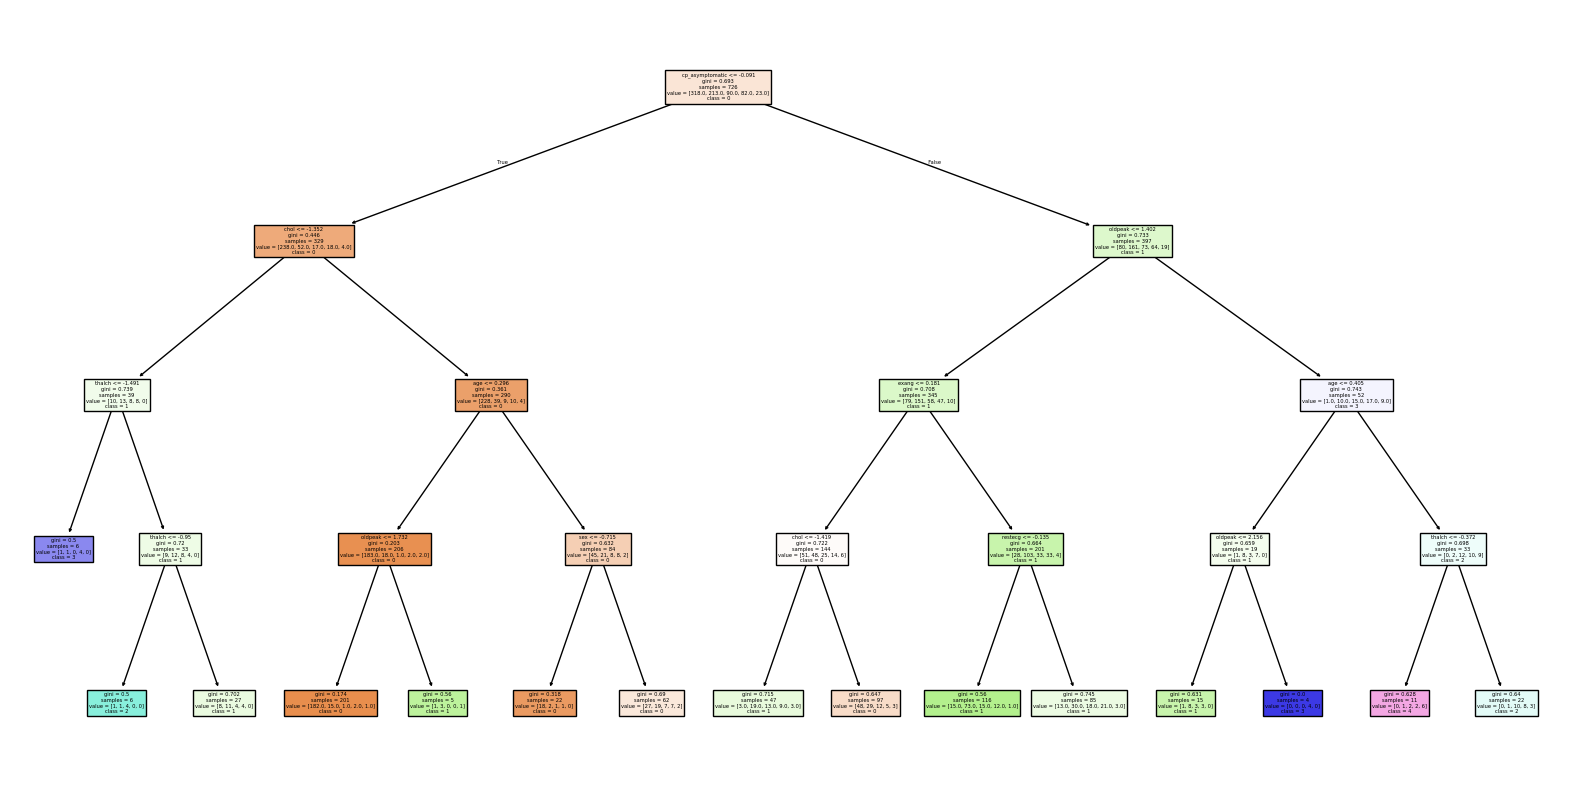

In [36]:
# Final Decision Tree Visualization
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt_classifier, filled=True, feature_names=x.columns, class_names=['0', '1', '2', '3', '4'])
plt.show()

### Interview Questions:

1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

- **criterion:** Determines the function used to measure the quality of a split. Common options are:
    - 'gini': Gini impurity.
    - 'entropy': Information gain based on entropy.


**max_depth:** Maximum depth of the tree. Limits how deep the tree can grow. A smaller depth prevents overfitting but might underfit, while a larger depth may overfit.

**min_samples_split:** Minimum number of samples required to split an internal node. Increasing this number prevents the model from learning overly specific patterns, thus reducing overfitting.

**min_samples_leaf:** Minimum number of samples required to be at a leaf node. Ensures that leaf nodes have enough samples to make the decision reliable.



**max_features:** Number of features to consider when looking for the best split. Reducing this number can help with overfitting and increase model robustness by introducing randomness.



**max_leaf_nodes:** Maximum number of leaf nodes in the tree. Limits the number of terminal nodes in the tree and can help with controlling overfitting.



**min_impurity_decrease:** A node will only be split if the impurity decrease is greater than this value. Helps in controlling the tree growth and complexity.



These hyperparameters impact the model’s performance by controlling the tree’s complexity, affecting its ability to generalize to unseen data.



2. What is the difference between the Label encoding and One-hot encoding?


  - **Label Encoding:**

     - **What:** Converts categorical values into numerical labels.
      - **How:** Each unique category value is assigned an integer value (e.g., 'Red' -> 0, 'Green' -> 1, 'Blue' -> 2).
      
       - **Pros:** Simple and efficient for models that can handle categorical data as numerical values.
    - **Cons:** Implies an ordinal relationship between categories that may not exist, potentially leading to misleading interpretations for certain algorithms.


- **One-Hot Encoding:**
    - **What:** Converts categorical values into a binary matrix (one column per category).
    - **How:** Each category is represented by a binary vector where only one element is 1 (the index of the category), and all others are 0 (e.g., for 'Red', [1, 0, 0]; for 'Green', [0, 1, 0]; for 'Blue', [0, 0, 1]).
    - **Pros:** Avoids the implication of ordinality and is more suitable for algorithms that do not handle categorical data directly.
    - **Cons:** Can lead to high-dimensional data if there are many unique categories, potentially increasing computational cost and risk of overfitting.
